<a href="https://colab.research.google.com/github/wjdgoruds2/Machine_Learning/blob/main/Assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Convolution**

In [ ]:
import numpy as np#벡터 행렬 연산
def Conv2D(X,W,w0,p=(0,0),s=(1,1)):#패딩:0 스트라이드:1
  n1=X.shape[0]+2*p[0] #패딩반영
  n2=X.shape[1]+2*p[1] #패딩반영
  X_p=np.zeros(shape=(n1,n2))#shape차원의 배열 생성
  X_p[p[0]:p[0]+X.shape[0],p[1]:p[1]+X.shape[1]]=X#입력 X를 복사
  res=[]
  for i in range(0,int(X_p.shape[0]-W.shape[0]/s[0])+1,s[0]):#입력+2*패딩-필터/스트라이드+1
    res.append([])
    for j in range(0,int(X_p.shape[1]-W.shape[1]/s[1])+1,s[1]):#입력+2*패딩-필터/스트라이드+1
      X_s=X_p[i:i+W.shape[0],j:j+W.shape[1]]#컨볼루션 영역
      res[-1].append(np.sum(X_s*W)+w0)#컨볼루션
  return (np.array(res))#컨볼루션 결과 반환

X=np.array([[1,1,1,0,0],[0,1,1,1,0],[0,0,1,1,1],[0,0,1,1,0],[0,1,1,0,0]])#입력 영상 배열
W=np.array([[1,0,1],[0,1,0],[1,0,1]])#필터 배열
w0=1#가중치

conv=Conv2D(X,W,w0,p=(0,0),s=(1,1))#패딩:0,스트라이드:1 컨볼루션
print('X=',X)
print('\nW=',W)#입력 배열
print('\n컨볼루션 결과 p=(0,0),s=(1,1)\n',conv)#패딩:0,스트라이드:1 컨볼루션 결과 출력
conv=Conv2D(X,W,w0,p=(1,1),s=(1,1))
print('\n컨볼루션 결과 p=(1,1),s=(1,1)\n',conv)#패딩:1,스트라이드:1 컨볼루션 결과 출력
conv=Conv2D(X,W,w0,p=(1,1),s=(2,2))
print('\n컨볼루션 결과 p=(1,1),s=(2,2)\n',conv)#패딩:1,스트라이드:2 컨볼루션 결과 출력


X= [[1 1 1 0 0]
 [0 1 1 1 0]
 [0 0 1 1 1]
 [0 0 1 1 0]
 [0 1 1 0 0]]

W= [[1 0 1]
 [0 1 0]
 [1 0 1]]

컨볼루션 결과 p=(0,0),s=(1,1)
 [[5. 4. 5.]
 [3. 5. 4.]
 [3. 4. 5.]]

컨볼루션 결과 p=(1,1),s=(1,1)
 [[3. 3. 4. 2. 2.]
 [2. 5. 4. 5. 2.]
 [2. 3. 5. 4. 4.]
 [2. 3. 4. 5. 2.]
 [1. 3. 3. 2. 2.]]

컨볼루션 결과 p=(1,1),s=(2,2)
 [[3. 4. 2.]
 [2. 5. 4.]
 [1. 3. 2.]]


**Pooling**

In [ ]:
import numpy as np#벡터 행렬 연산
def maxPooling(mat,K,L):#최대값 풀링
  M,N=mat.shape #입력 영상의 배열:M×N
  MK=M//K #MK:M배열->K배열로
  NL=N//L #NL:N배열->L배열로
  pmat=mat[:MK*K,:NL*L].reshape(MK,K,NL,L).max(axis=(1,3))#4차원 MK×K×NL×L
  return pmat #결과 값 반환

mat=np.array([[20,200,-5,23], #입력 영상 배열
              [-13,134,119,100],
              [120,32,49,25],
              [-120,12,9,23]])
print(maxPooling(mat,2,2))#2×2 최대값 풀링 결과 출력


[[200 119]
 [120  49]]


**PyTorch의 텐서-1**

In [ ]:
import numpy as np#벡터 행렬 연산
import torch #pytorch사용

A=torch.tensor([[1.,-1.],[1.,-1.]])#numpy배열을 tensor로 변환
print('A=',A)#tensor로 변환된 A값
B=torch.tensor(np.array([[1,2,3],[4,5,6]]))#numpy배열을 tensor로 변환
print('B=',B)#tensor로 변환된 B값

C=torch.rand(3,3)#3×3 배열로 0~1사이값 균등하게 생성
print('C=',C)

D=C.numpy()#C값을 numpy배열로 변환
print('D=',D)

E=B.view(1,1,2,3)#1개의 1×2배열로 변환
print('E=',E)

print('sum of A=',A.sum())#A의 합
print('mean of A=',A.mean())#A의 평균


A= tensor([[ 1., -1.],
        [ 1., -1.]])
B= tensor([[1, 2, 3],
        [4, 5, 6]])
C= tensor([[0.5109, 0.2744, 0.6618],
        [0.6300, 0.8138, 0.4164],
        [0.0646, 0.3456, 0.9114]])
D= [[0.5109232  0.2743551  0.6617731 ]
 [0.6299593  0.8137728  0.41639245]
 [0.06461138 0.3456288  0.91140884]]
E= tensor([[[[1, 2, 3],
          [4, 5, 6]]]])
sum of A= tensor(0.)
mean of A= tensor(0.)


**PyTorch의 텐서-2**

In [ ]:
import torch #pytorch사용
from torch.autograd import Variable#자동 미분 패키지
x=Variable(torch.tensor([[2.]]),requires_grad=True)#무작위 값을 갖는 Tensor를 생성
print('x=',x)#x값
print('x.data=',x.data)#Tensor값
print('x.grad=',x.grad)#data가 거쳐온 layer에 대한 미분값이 축적되는 것
print('x.grad_fn()=',x.grad_fn)#미분값을 계산한 함수에 대한 정보

y=x*x*3#y값 연산
print('\ny=',y)#y값
print('y.data=',y.data)#Tensor값
print('y.grad=',y.grad)#data가 거쳐온 layer에 대한 미분값이 축적되는 것
print('y.grad_fn()=',y.grad_fn)#미분값을 계산한 함수에 대한 정보
z=y**2#z값 연산
print('\nz=',z)#z값
print('z.data=',z.data)#Tensor값
print('z.grad=',z.grad)#data가 거쳐온 layer에 대한 미분값이 축적되는 것
z.backward()#역전파 단계
print('\nAfter invocation of backward()')
print('\nx=',x)#역전파 후 x값
print('x.data=',x.data)#역전파 후 Tensor값
print('x.grad=',x.grad)#역전파 후 data가 거쳐온 layer에 대한 미분값이 축적되는 것
print('x.grad_fn()=',x.grad_fn)#역전파 후 미분값을 계산한 함수에 대한 정보
print('\ny=',y)#역전파 후
print('y.data=',y.data)#역전파 후 Tensor값
print('y.grad=',y.grad)#역전파 후 data가 거쳐온 layer에 대한 미분값이 축적되는 것
print('y.grad_fn()=',y.grad_fn)#역전파 후 미분값을 계산한 함수에 대한 정보
print('\nz=',z)#역전파 후
print('z.data=',z.data)#역전파 후 Tensor값
print('z.grad=',z.grad)#역전파 후data가 거쳐온 layer에 대한 미분값이 축적되는 것


x= tensor([[2.]], requires_grad=True)
x.data= tensor([[2.]])
x.grad= None
x.grad_fn()= None

y= tensor([[12.]], grad_fn=<MulBackward0>)
y.data= tensor([[12.]])
y.grad= None
y.grad_fn()= <MulBackward0 object at 0x7f9f789d6410>

z= tensor([[144.]], grad_fn=<PowBackward0>)
z.data= tensor([[144.]])
z.grad= None

After invocation of backward()

x= tensor([[2.]], requires_grad=True)
x.data= tensor([[2.]])
x.grad= tensor([[288.]])
x.grad_fn()= None

y= tensor([[12.]], grad_fn=<MulBackward0>)
y.data= tensor([[12.]])
y.grad= None
y.grad_fn()= <MulBackward0 object at 0x7f9f789d6850>

z= tensor([[144.]], grad_fn=<PowBackward0>)
z.data= tensor([[144.]])
z.grad= None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
/usr/local/lib/python3

**PyTorch의 MLP프로그래밍**

In [ ]:
from sklearn.datasets import fetch_openml #sklearn 라이브러리에서 제공하는 ministdataset
mnist=fetch_openml('mnist_784',version=1,cache=True)

X=mnist.data/255 #픽셀값 나눔
y=mnist.target


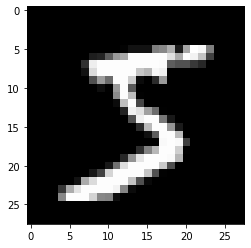

이미지 레이블:5


In [ ]:
import matplotlib.pyplot as plt#그래프 시각화 위함
plt.imshow(X[0].reshape(28,28),cmap='gray')#28×28배열의 이미지 
plt.show()#이미지 출력
print("이미지 레이블:{}".format(y[0]))#이미지가 나타내는 값



In [ ]:
import torch #pytorch사용
from torch.utils.data import TensorDataset,DataLoader#미니배치 학습이나 데이터 셔플,병렬 처리 등 가능
from sklearn.model_selection import train_test_split#학습과 테스트 데이터 분리

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/7,random_state=0)#학습과 테스트 데이터를 1/7,6/7로 나눔
X_train=torch.Tensor(X_train)#학습데이터 tensor변환
X_test=torch.Tensor(X_test)#테스트데이터 tensor변환
y_train=torch.LongTensor(list(map(int,y_train)))#y_train를 int형으로 변환한 배열 LongTensor로 변환
y_test=torch.LongTensor(list(map(int,y_test)))#y_test를 int형으로 변환한 배열 LongTensor로 변환

ds_train=TensorDataset(X_train,y_train)#입력:X_train,출력:y_train에 대응되는 데이터 집합 생성
ds_test=TensorDataset(X_test,y_test)#입력:X_test,출력:y_test에 대응되는 데이터 집합 생성

loader_train=DataLoader(ds_train,batch_size=64,shuffle=True)#[64, channel, width, height]형태로 무작위 데이터셋 담음
loader_test=DataLoader(ds_test,batch_size=64,shuffle=False)#[64, channel, width, height]형태로 무작위 데이터셋 담음


In [ ]:
from torch import nn#신경망 패키지 생성
model=nn.Sequential()#레이어를 순차적으로 model생성
model.add_module('fc1',nn.Linear(28*28*1,100))#입력:28*28*1,출력:100개
model.add_module('relu1',nn.ReLU())#ReLU연산
model.add_module('fc2',nn.Linear(100,100))#입력:100개,출력:100개
model.add_module('relu2',nn.ReLU())#ReLU연산
model.add_module('fc23',nn.Linear(100,100))#입력:100개,출력:100개


In [ ]:
from torch import optim#최적화
loss_fn=nn.CrossEntropyLoss()#손실함수
optimizer=optim.Adam(model.parameters(),lr=0.01)#Adam방식으로 손실함수의 미분 기울기 따라 이동


In [ ]:
def train(epoch):
  model.train()#학습 모드로 변환
  for data,targets in loader_train:
    optimizer.zero_grad()#역전파 오차 계산의 초기화
    outputs=model(data)#출력 값
    loss=loss_fn(outputs,targets)#손실도 계산
    loss.backward()#손실도 역전파
    optimizer.step()#최적화
  print('epoch{}:완료'.format(epoch))


In [ ]:
def test(head):
  model.eval()#추론 모델로 변환
  correct=0
  with torch.no_grad():#추론 과정에서 그레디언트 과정 불필요
   for data,targets in loader_test:
    outputs=model(data)#출력값
    _,predicted=torch.max(outputs.data,1)#가장 높은 값을 가지는 인덱스 선택
    correct+=predicted.eq(targets.data.view_as(predicted)).sum()#predicted배열과 data 일치하는 개수 합
  data_num=len(loader_test.dataset)#데이터 개수
  print('{}accuarcy:{}/{}({:.0f}%)'.format(head,correct,data_num,100.*correct/data_num))#정확도 계산
test('시작')


시작accuarcy:22/10000(0%)


In [ ]:
for epoch in range(3):
 train(epoch)#epoch만큼 학습
 test('학습중')


epoch0:완료
학습중accuarcy:9524/10000(95%)
epoch1:완료
학습중accuarcy:9527/10000(95%)
epoch2:완료
학습중accuarcy:9582/10000(96%)


**CNN모델을 이용한 MNIST데이터 분류**

In [ ]:
from sklearn.datasets import fetch_openml #sklearn 라이브러리에서 제공하는 ministdataset
mnist=fetch_openml('mnist_784',version=1,cache=True)

X=mnist.data/255 #픽셀값 나눔
y=mnist.target

import torch #pytorch사용
from torch.utils.data import TensorDataset,DataLoader#미니배치 학습이나 데이터 셔플,병렬 처리 등 가능
from sklearn.model_selection import train_test_split#학습과 테스트 데이터 분리

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=1/7,random_state=0)#학습과 테스트 데이터를 1/7,6/7로 나눔
X_train=torch.Tensor(X_train)#학습데이터 tensor변환
X_test=torch.Tensor(X_test)#테스트데이터 tensor변환
y_train=torch.LongTensor(list(map(int,y_train)))#y_train를 int형으로 변환한 배열 LongTensor로 변환
y_test=torch.LongTensor(list(map(int,y_test)))#y_test를 int형으로 변환한 배열 LongTensor로 변환


import torch.nn as nn#pytorch 라이브러리 사용
import torch.nn.functional as F#Conv,Pooling등의 기능 제공
from torch import optim#최적화
from torch.autograd import Variable#자동 미분

X_train=X_train.view(-1,1,28,28).float()#학습데이터 28*28 변환
X_test=X_test.view(-1,1,28,28).float()#테스트데이터 28*28 변환
print(X_train.shape)#학습데이터 차원 출력
print(X_test.shape)#테스트데이터 차원 출력

train=TensorDataset(X_train,y_train)#입력:X_train,출력:y_train에 대응되는 데이터 집합 생성
test=TensorDataset(X_test,y_test)#입력:X_test,출력:y_test에 대응되는 데이터 집합 생성
BATCH_SIZE=32#가중치 배치 사이즈 설정
loader_train=DataLoader(train,batch_size=BATCH_SIZE,shuffle=True)#[64, channel, width, height]형태로 무작위 데이터셋 담음
loader_test=DataLoader(test,batch_size=BATCH_SIZE,shuffle=False)#[64, channel, width, height]형태로 무작위 데이터셋 담음

class CNN(nn.Module):
  def __init__(self):
    super(CNN,self).__init__()
    self.conv1=nn.Conv2d(1,32,kernel_size=5)#conv1정의:1채널 짜리를 입력받아서 32채널을 뽑아내는데 커널 사이즈는 5
    self.conv2=nn.Conv2d(32,32,kernel_size=5)#conv2정의:32채널 짜리를 입력받아서 32채널을 뽑아내는데 커널 사이즈는 5
    self.conv3=nn.Conv2d(32,64,kernel_size=5)#conv3정의:32채널 짜리를 입력받아서 64채널을 뽑아내는데 커널 사이즈는 5
    self.fc1=nn.Linear(3*3*64,256)# 입력 = 3*3*64, 출력 = 256
    self.fc2=nn.Linear(256,10)# 입력 = 256, 출력 =10

    self.loss_fn=nn.CrossEntropyLoss()#손실함수 
    self.optimizer=optim.Adam(self.parameters(),lr=0.01)#Adam방식으로 손실함수의 미분 기울기 따라 이동#손실함수

  def forward(self,x):
    x=F.relu(self.conv1(x))#relu(x)연산
    x=F.relu(F.max_pool2d(self.conv2(x),2))#max_pool2d(x,2,2)연산
    x=F.dropout(x,p=0.5,training=self.training)#dropout연산
    x=F.relu(F.max_pool2d(self.conv3(x),2))#relu(x)연산
    x=F.dropout(x,p=0.5,training=self.training)#dropout연산
    x=x.view(-1,3*3*64)#view(-1,3*3*64)
    x=F.relu(self.fc1(x))#relu(x)연산
    x=F.dropout(x,training=self.training)#dropout연산
    x=self.fc2(x)
    return F.log_softmax(x,dim=1)#소프트맥스 순으로 학습

def fit(model,loader_train):
    optimizer=torch.optim.Adam(model.parameters())#Adam방식으로 최적화
    error=nn.CrossEntropyLoss()#손실도
    EPOCHS=1#에포크설정
    model.train()#모델 학습
    for epoch in range(EPOCHS):
      correct=0#정확도
      for batch_idx,(X_batch,y_batch)in enumerate(loader_train):
        var_X_batch=Variable(X_batch).float()#float으로 형 변환 x변수
        var_y_batch=Variable(y_batch)#y변수 
        optimizer.zero_grad()# 그래디언트 버퍼를 0으로 초기화해준다.
        output=model(var_X_batch)#출력값
        loss=error(output,var_y_batch)#손실도
        loss.backward()# loss.backward함수로 그라디언트를 초기화
        optimizer.step()#업데이트
        predicted=torch.max(output.data,1)[1]#예측값
        correct+=(predicted==var_y_batch).sum()#정확도 계산
        if batch_idx %50==0:
          print('에포크:{}[{}/{}({:.0f}%)]\t 손실함수 :{:.6f}\t Accuracy:{:.3f}%'.format(epoch,batch_idx*len(X_batch),len(loader_train),100.*batch_idx/len(loader_train),loss.data,correct*100./(BATCH_SIZE*(batch_idx+1))))
def evaluate(model):
  correct=0#정확도
  for test_imgs,test_labels in loader_test:
    test_imgs=Variable(test_imgs).float()#float으로 형변환 imgs변수
    output=model(test_imgs)#출력값
    predicted=torch.max(output,1)[1]#예측도
    correct+=(predicted==test_labels).sum()#정확도
  print("테스트 데이터 정확도:{:.3f}%".format(float(correct)/(len(loader_test)*BATCH_SIZE)))
cnn=CNN()#CNN설정
evaluate(cnn)#평가
fit(cnn,loader_train)#학습
cnn.eval()#model.train() 모드로 변한 것처럼 평가 
evaluate(cnn)#평가
index=10
data=X_test[index].view(-1,1,28,28).float()#테스트데이터 28*28 변환
output=cnn(data)#출력값
print('{}번째 학습데이터의 데스트 결과:{}'.format(index,output))
_,predicted=torch.max(output,1)#예측값
print('{}번째 데이터의 예측:{}'.format(index,predicted.numpy()))
print('실제 레이블:{}'.format(y_test[index]))


torch.Size([60000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])
테스트 데이터 정확도:0.104%
에포크:0[0/1875(0%)]	 손실함수 :21.132071	 Accuracy:9.375%
에포크:0[1600/1875(3%)]	 손실함수 :2.044613	 Accuracy:15.625%
에포크:0[3200/1875(5%)]	 손실함수 :1.315636	 Accuracy:33.880%
에포크:0[4800/1875(8%)]	 손실함수 :0.715555	 Accuracy:46.647%
에포크:0[6400/1875(11%)]	 손실함수 :0.660421	 Accuracy:54.462%
에포크:0[8000/1875(13%)]	 손실함수 :0.565560	 Accuracy:60.110%
에포크:0[9600/1875(16%)]	 손실함수 :0.460164	 Accuracy:64.452%
에포크:0[11200/1875(19%)]	 손실함수 :0.518507	 Accuracy:67.468%
에포크:0[12800/1875(21%)]	 손실함수 :0.451565	 Accuracy:69.927%
에포크:0[14400/1875(24%)]	 손실함수 :0.642527	 Accuracy:71.847%
에포크:0[16000/1875(27%)]	 손실함수 :0.386389	 Accuracy:73.572%
에포크:0[17600/1875(29%)]	 손실함수 :0.269271	 Accuracy:74.932%
에포크:0[19200/1875(32%)]	 손실함수 :0.550737	 Accuracy:76.191%
에포크:0[20800/1875(35%)]	 손실함수 :0.273224	 Accuracy:77.184%
에포크:0[22400/1875(37%)]	 손실함수 :0.107513	 Accuracy:78.138%
에포크:0[24000/1875(40%)]	 손실함수 :0.153606	 Accuracy:79.032%
에포크:0[25600/1875(43%)

**IRIS 데이터의 학습**

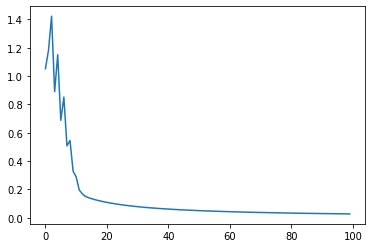

In [ ]:
import torch#pytorch라이브러리 사용
from  torch import nn,optim#최적화
from sklearn.datasets import load_iris#iris데이터셋 불러옴
from torch.utils.data import TensorDataset,DataLoader#미니배치 학습이나 데이터 셔플,병렬 처리 등 가능

iris=load_iris()#iris데이터 불러옴

X=iris.data[:100]#실제데이터
y=iris.target[:100]#라벨데이터

X=torch.tensor(X,dtype=torch.float32)#텐서로 변환
y=torch.tensor(y,dtype=torch.float32)#텐서로 변환

net=nn.Linear(4,1)# iris 데이터는 4차원
loss_fn=nn.BCEWithLogitsLoss()# 시그모이드 함수를 적용해서 두 클래스의 분류를 위한 크로스 엔트로피를 계산
optimizer=optim.SGD(net.parameters(),lr=0.25)# SGD(약간 큰 학습률)
losses=[]# 손실 함수 로그

for epoc in range(100):# 100회 반복
  batch_loss=0.0
  optimizer.zero_grad() # 전회의 backward 메서드로 계산된 경사값을 초기화
  y_pred=net(X) # 선형 모델으로 y 예측값을 계산
  loss=loss_fn(y_pred.view_as(y),y) # MSE loss를 사용한 미분 계산
  loss.backward()
  optimizer.step()# 경사를 갱신
  batch_loss+=loss.item()#수렴 확인을 위한 loss를 기록
  losses.append(batch_loss)
from matplotlib import pyplot as plt#시각화 위함
plt.plot(losses)#손실도 그래프 출력
plt.show()

**8ⅹ8 MNIST 데이터의 인식**

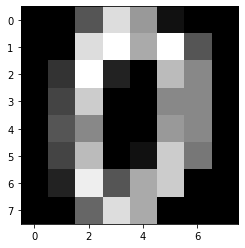

실행 시간: 3.70182 sec


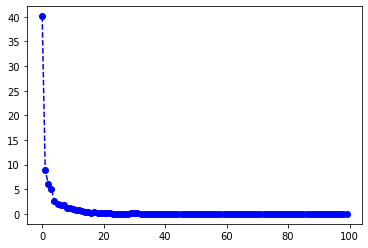

In [ ]:
import torch#pytorch라이브러리 사용
from  torch import nn,optim#최적화
from sklearn.datasets import load_digits#digits데이터 
from torch.utils.data import TensorDataset,DataLoader#미니배치 학습이나 데이터 셔플,병렬 처리 등 가능
import time#시간모듈
from matplotlib import pyplot as plt#시각화 위함

digits=load_digits())#digits데이터 불러옴
X=digits.data#실제데이터
Y=digits.target#라벨데이터

plt.imshow(X[0].reshape(8,8),cmap='gray')#8*8그레이 이미지 
plt.show()#0번째 이미지 출력

X=torch.tensor(X,dtype=torch.float32)#텐서로 변환
Y=torch.tensor(Y,dtype=torch.int64)#텐서로 변환

dataset=TensorDataset(X,Y)#입력:X,출력:Y에 대응되는 데이터 집합 생성
train_loader=DataLoader(dataset,batch_size=64,shuffle=True)#[64, channel, width, height]형태로 무작위 데이터셋 담음

net=nn.Sequential(
    nn.Linear(64,32),#64입력 32출력
    nn.ReLU(),#ReLU연산
    nn.Linear(32,16),#32입력 16출력
    nn.ReLU(),#ReLU연산
    nn.Linear(16,10)#16입력 10출력
)
loss_function=nn.CrossEntropyLoss()#손실함수
optimizer=optim.Adam(net.parameters(),lr=0.005)#Adam방식으로 손실함수의 미분 기울기 따라 이동

losses=[]#손실도
start_time=time.time()#시작시간 설정

for epoc in range(100):
  running_loss=0.0#손실도
  for x_minibatch,y_minibatch in train_loader:
    pred=net(x_minibatch) # 선형 모델으로 y 예측값을 계산
    loss=loss_function(pred,y_minibatch)# MSE loss를 사용한 미분 계산
    optimizer.zero_grad() #  경사값을 초기화
    loss.backward()#backward()
    optimizer.step()# 경사를 갱신
    running_loss+=loss.item()#수렴 확인을 위한 loss를 기록
  losses.append(running_loss)

print('실행 시간: %0.5f sec'%(time.time()-start_time))#실행시간 출력

plt.plot(losses,color='blue',linestyle='dashed',marker='o')#손실도 그래프로 출력
plt.show()

